# PCA(주성분 분석)
 - PC : principal component, 차원을 줄이면서 정보의 loss를 줄이는 방법(데이터의 분산을 보존)
 - 변수가 너무 많으면 차원이 커져 학습이 잘 이루워지지 않는다.
 - PC의 개수를 지정하여 변수들을 PC score로 만들어 준다.(eigen value값이나 scree plot을 보고 결정)
 - 만든 PC들을 변수로 선택하여 학습을 한다.
 - 공분산 구조를 이용하하여 공분산 구조에서 데이터에 손실을 가장 적게 하는 축을 찾고 그 축으로 데이터를 정사영한다.
 - 공분산 구조를 보고 공부산이 높을시 차원축소를 할수있다.
 ---------------------------------------------------------------
 - 단점 : 공분산구조를 활용하므로 선형관계가 있을 시에 활용가능 하다.
 - 선형관계가 없을 시에는 kernel PCA 활용

 - 예를 들어 2차원 데이터라고 할때

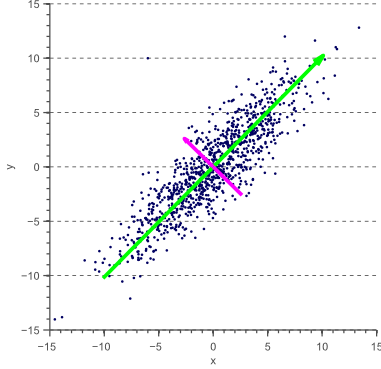

In [6]:
from IPython.display import Image  
Image('./correlated_2d.png',width=350,height=100)

 - 위에 초록색 직선은 분산을 가장 잘 설명하는 방향이다.
 - 위에 보라색 직선은 분산을 가장 못 설명하는 방향이다.
 - 이때 직선위에 정사영을 내렸을때 나온 좌표가 PC Score가 된다.
 
 ex) (a,b,c,d)라는 데이터를 3차원 직선에 정사영을 내려 (a',b',c')이 되었을때
 PC1 : a', PC2 : b' ,PC3 : c'이 된다


## PCA 수학적 개념
### SVD(Singular Value Decomposition) : 특이값 분해
 - $ X = UDV^T$ : 데이터
 - $ U = XX^T $ : m*m 직교행렬 
 - $ D = XX^T $ : m*n 대각행렬
 - $ V = X^TX $ : m*n 직교행렬  이때 V는 분산을 설명해주는 축을 벡터를 말한다.(eigen vector)
### PC Score 구하기
 - PC Score : $XV =  UD$      
 - X를 V 위로 정사영을 내린다.

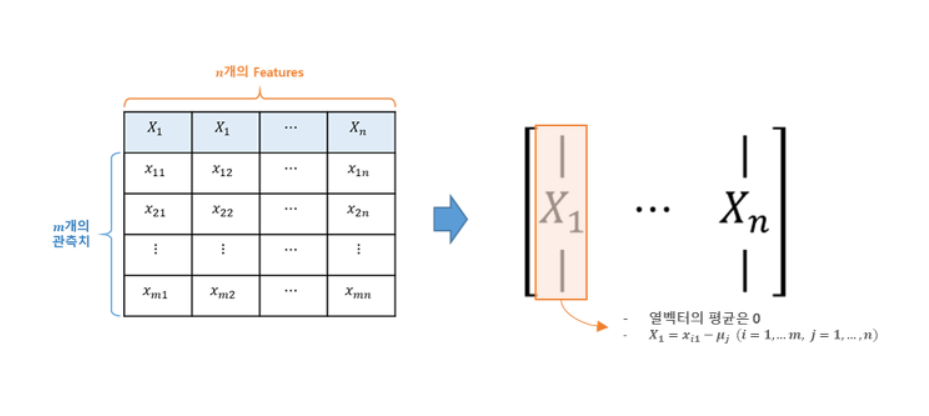

In [7]:
from IPython.display import Image  
Image('./cov.png',width=700,height=1000)

## Kernel PCA
 - 비선형 문제를 해결하기 위해 사용한다.
 - 아래와 같이 되어있으면 공분산은 0 일것이다.(선형관계가 없다.)
 - 이럴때는 관측치 사이에 패턴을 수치화 하여 PC로 사용한다.(비슷할수록 커짐)

 - ex)$ K = XX^T $일때
 -     $X = UDV^T => K = UDV^TVD^TU^T = UD^2U^T $
 - 나머지는 동일

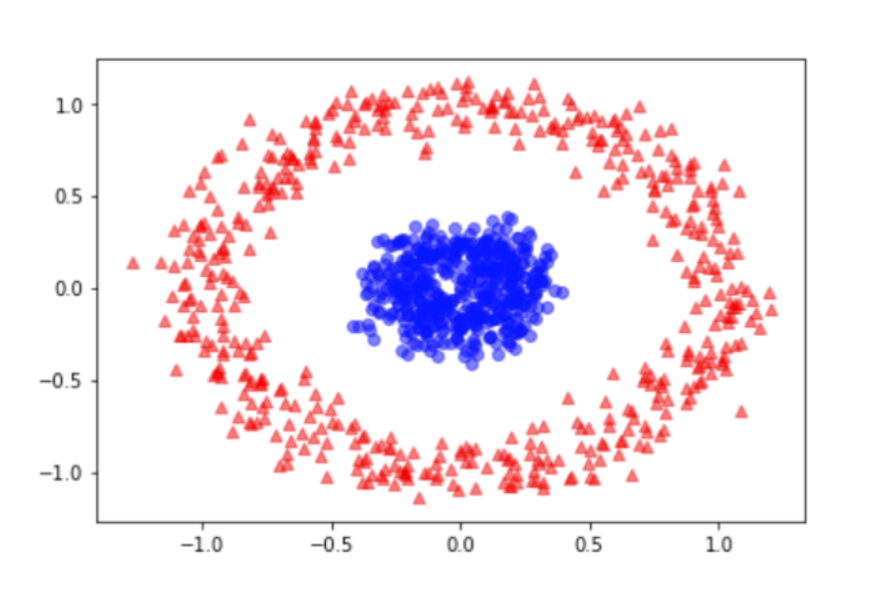

In [2]:
from IPython.display import Image  
Image('./kernel.png',width=500,height=1000)

## PCA example

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
err_data_target = pd.read_csv('./err_model_nm_target.csv')
train_data = err_data_target.drop(['user_id','model_nm','target'],axis =1)
target_data = err_data_target['target']

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_data, target_data, test_size = 0.2,random_state=42)

- StandardScaler 적용

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
# 기본모델은 의사결정나무
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=10)

In [17]:
print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.8709510682288077
0.7746381805651275


- scale 전

In [45]:
model2 = DecisionTreeClassifier(max_depth =10)
model2.fit(train_input, train_target)
print(model2.score(train_input, train_target))
print(model2.score(test_input, test_target))

0.8702618883528601
0.7767057201929704


### pca 적용해보기

In [26]:
pca = PCA(n_components=20)

In [27]:
pca.fit(train_scaled)

PCA(n_components=20)

In [31]:
pca.explained_variance_ratio_

array([0.10994828, 0.08315464, 0.081148  , 0.0546863 , 0.05349528,
       0.04731947, 0.03969208, 0.03374289, 0.02753595, 0.02720317,
       0.02585794, 0.02571979, 0.0251759 , 0.02483306, 0.02454544,
       0.0241542 , 0.02397889, 0.02320597, 0.02268257, 0.02233447])

In [37]:
sum(pca.explained_variance_ratio_)

0.8004142911636282

In [33]:
pca_data = pca.transform(train_scaled)[:,0:6]

In [34]:
pca_test_data = pca.transform(test_scaled)[:,0:6]

In [36]:
model.fit(pca_data,train_target)
print(model.score(pca_data,train_target))
print(model.score(pca_test_data,test_target))

0.8556168159889731
0.757408683666437


 - scale 하기전

In [49]:
pca2 = PCA(n_components=20)
pca2.fit(train_input)
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))
pca_data2 = pca2.transform(train_input)[:,0:6]
pca_data_test2 = pca2.transform(test_input)[:,0:6]

[5.16680474e-01 2.32997256e-01 9.91489964e-02 7.29149538e-02
 3.68138966e-02 1.14886085e-02 7.62373126e-03 6.31463445e-03
 5.12970178e-03 3.39893695e-03 2.11734256e-03 2.03593100e-03
 1.55300770e-03 6.33635267e-04 3.38926423e-04 2.61307693e-04
 1.92277516e-04 1.48740034e-04 9.22738562e-05 5.04328465e-05]
0.9999350642190219


In [50]:
model2.fit(pca_data2,train_target)
print(model2.score(pca_data2,train_target))
print(model2.score(pca_data_test2,test_target))

0.8139214334941419
0.7236388697450035


- PCA개수 변화해보기

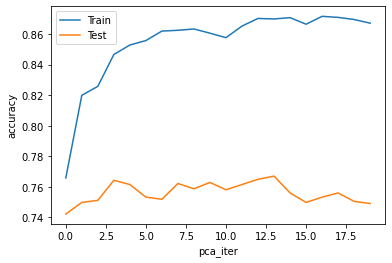

In [38]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

for i in range(20):
    pca_data = pca.transform(train_scaled)[:,0:i+1]
    pca_test_data = pca.transform(test_scaled)[:,0:i+1]
    
    model.fit(pca_data,train_target)
    
    train_score.append(model.score(pca_data,train_target))
    test_score.append(model.score(pca_test_data,test_target))
    
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('pca_iter')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

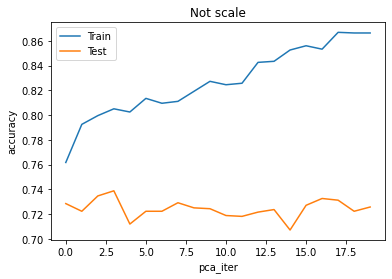

In [53]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

for i in range(20):
    pca_data2 = pca2.transform(train_input)[:,0:i+1]
    pca_data_test2 = pca2.transform(test_input)[:,0:i+1]
    
    model2.fit(pca_data2,train_target)
    
    train_score.append(model2.score(pca_data2,train_target))
    test_score.append(model2.score(pca_data_test2,test_target))
    
plt.plot(train_score)
plt.plot(test_score)
plt.title('Not scale')
plt.xlabel('pca_iter')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

### 차원에 영향이 큰 모델로 해보기

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

In [40]:
knn.fit(train_scaled,train_target)
print(knn.score(train_scaled,train_target))
print(knn.score(test_scaled, test_target))

1.0
0.7835975189524466


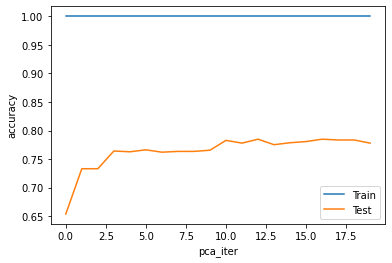

In [42]:
knn_train_score = []
knn_test_score = []

for i in range(20):
    pca_data = pca.transform(train_scaled)[:,0:i+1]
    pca_test_data = pca.transform(test_scaled)[:,0:i+1]
    
    knn.fit(pca_data,train_target)
    
    knn_train_score.append(knn.score(pca_data,train_target))
    knn_test_score.append(knn.score(pca_test_data,test_target))
    
plt.plot(knn_train_score)
plt.plot(knn_test_score)
plt.xlabel('pca_iter')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

1.0
0.7236388697450035
------------------------------------


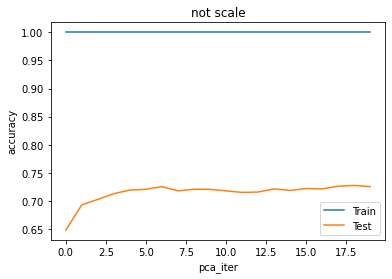

In [57]:
knn2 = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
knn2.fit(train_input,train_target)
print(knn2.score(train_input,train_target))
print(knn2.score(test_input, test_target))
print('------------------------------------')
knn_train_score = []
knn_test_score = []

for i in range(20):
    pca_data3 = pca.transform(train_input)[:,0:i+1]
    pca_test_data3 = pca.transform(test_input)[:,0:i+1]
    
    knn2.fit(pca_data3,train_target)
    
    knn_train_score.append(knn2.score(pca_data3,train_target))
    knn_test_score.append(knn2.score(pca_test_data3,test_target))
    
plt.plot(knn_train_score)
plt.plot(knn_test_score)
plt.title('not scale')
plt.xlabel('pca_iter')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()